In [1]:
from fastai.vision.all import *

KeyboardInterrupt: 

In [18]:
work_dir = Path()
image_path = work_dir / "data/full_dataset/"

In [19]:
item_tfms = RandomResizedCrop(460, min_scale=0.75)
batch_tfms = [*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]

In [20]:
dls = ImageDataLoaders.from_folder(image_path, train="train", valid="valid",
                                   item_tfms=item_tfms, batch_tfms=batch_tfms, bs = 64)

In [21]:
learner = vision_learner(dls, resnet34, metrics = [accuracy, perplexity])

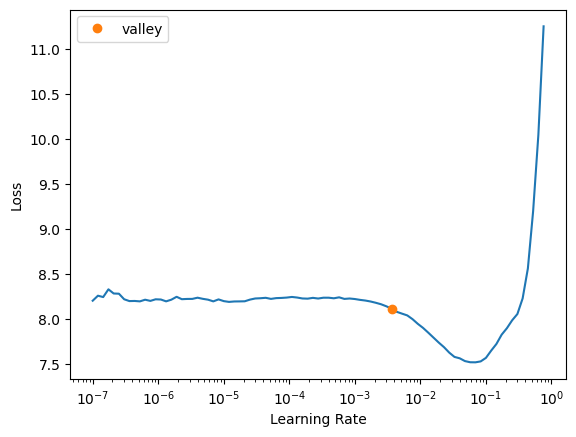

In [22]:
lr_finder = learner.lr_find()

In [23]:
lr_finder.valley

0.00363078061491251

In [24]:
learner.fine_tune(10, base_lr=lr_finder.valley)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,1.437430,0.515405,0.861714,1.674316,03:33


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.725092,0.226111,0.940190,1.253715,04:44
1,0.701302,0.246321,0.925714,1.279310,04:44
2,0.672637,0.233285,0.938286,1.262741,04:36
3,0.548032,0.179144,0.948571,1.196192,05:08
4,0.404945,0.153198,0.961524,1.165555,05:11
5,0.300461,0.131214,0.966857,1.140211,05:11
6,0.194253,0.096930,0.976381,1.101783,05:11
7,0.144072,0.076780,0.982095,1.079804,05:12
8,0.103130,0.072833,0.983619,1.075551,05:11
9,0.086595,0.071312,0.984381,1.073916,05:12


In [27]:
learner.fit_one_cycle(10, lr_max = lr_finder.valley)

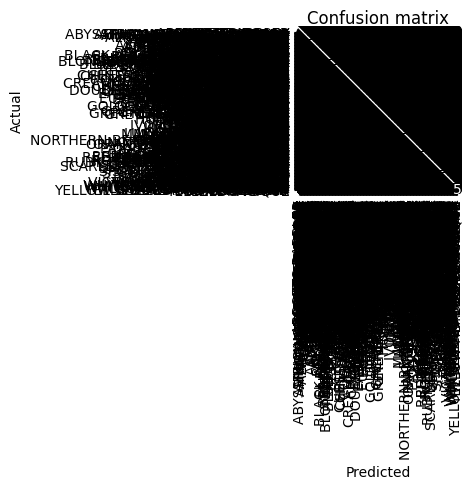

In [25]:
from fastai.interpret import ClassificationInterpretation

interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()